# Load necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define data frame

In [2]:
df = pd.DataFrame({
    "Component": ["Pump"]*3 + ["Valve"]*2 + ["Powerboard"]*2 + ["Fan"]*3 + ["Housing"]*8 + ["Stator"]*12 + ["Rotor"]*20,
    "Scrapped Value": np.random.randint(5000, 90000, 50)
})

df

,Component,Scrapped Value
0,Pump,49619
1,Pump,77229
2,Pump,87434
3,Valve,45785
4,Valve,28333
5,Powerboard,58343
6,Powerboard,41294
7,Fan,12338
8,Fan,10720
9,Fan,79382


# Generate pivot table and calculate cumulative percentage

In [3]:
grp = df.groupby('Component').sum().sort_values(by=["Scrapped Value"], ascending=False)
grp["Cumulative Percentage"] = (grp["Scrapped Value"]/grp["Scrapped Value"].sum()).cumsum()
grp

,Scrapped Value,Cumulative Percentage
Component,,
Rotor,880213,0.410296
Stator,542559,0.663201
Housing,232061,0.771372
Pump,214282,0.871256
Fan,102440,0.919007
Powerboard,99637,0.965451
Valve,74118,1.000000


# Plot Pareto Chart

(0.0, 100.0)

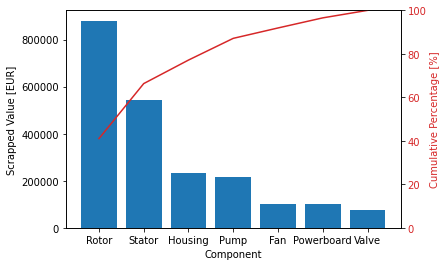

In [4]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Component')
ax1.set_ylabel('Scrapped Value [EUR]')
ax1.bar(grp.index, grp["Scrapped Value"])

ax2 =ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Cumulative Percentage [%]', color=color)
ax2.plot(grp.index, grp["Cumulative Percentage"]*100, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)